# Loan Classification

#### This project aims in determining if a person or an institution is to be provided with a loan
#### Provided are the steps followed:
#### Importing required libraries and dataset
#### Data Preprocessing
#####        - Dropping high correlated and unncessary columns
#####        - Imputing or dropping null values
#####        - Encoding categorical variables
#####        - Dividing Dependent and Independent variables
#### Splitting the dataset into Train and Test Set
#### Applying Classification Models

## Importing libraries and dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
dataset = pd.read_csv("credit_train.csv")

In [12]:
dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Data Preprocessing

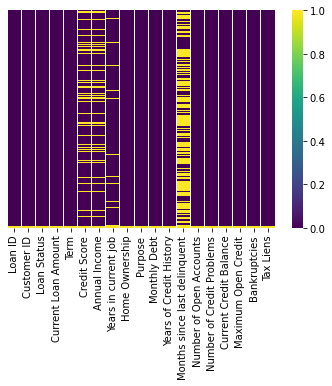

In [13]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

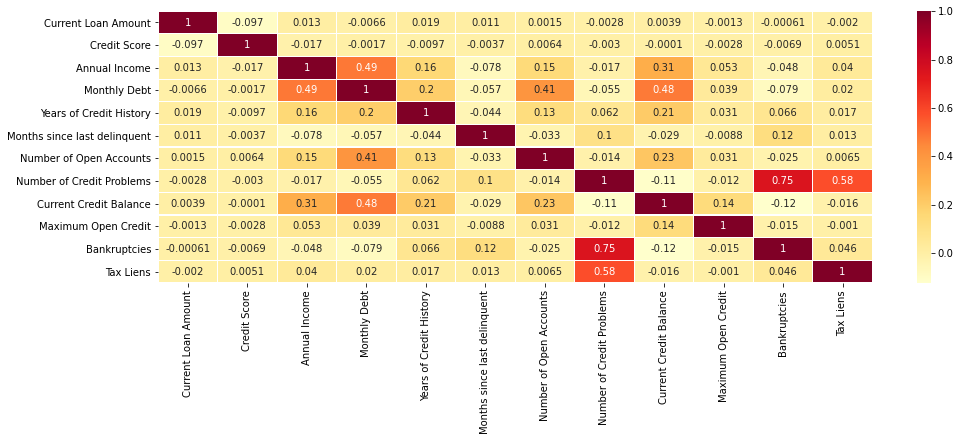

In [14]:
plt.figure(figsize = (16,5))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.1,cmap= "YlOrRd")
plt.show()

To move further it is important to drop unnecessary columns.
Removal of highly correlated columns is advised as the other correlated column will be exerting the same effect on the model

#### Dropping the highly correlated and unneccesary columns

In [15]:
dataset.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [9]:
dataset.drop(columns=['Loan ID','Customer ID','Bankruptcies'],inplace=True)

Here Bankrupties is highly correlated to "number of Credit problems". Among both columns, as bankruptcies have higher number of null values, remove "Bankruptcies"

In [89]:
dataset.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Tax Liens                         524
dtype: int64

In [90]:
# Missing values of delinquent
round(((37628/70360) * 100),2)

53.48

As more than half values of "Months since last delinquent" and there is not much correlation of this column with any other variables, this column has to be removed

In [91]:
dataset.drop(columns=['Months since last delinquent'],inplace=True)

In [92]:
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0


#### Imputing or droping null values

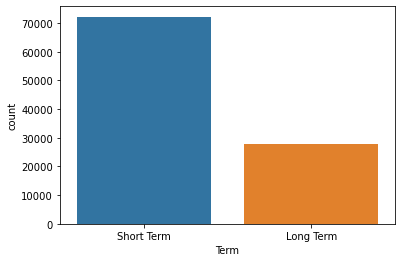

In [93]:
sns.countplot(x='Term',data=dataset)
plt.show()

In [94]:
dataset["Term"].isnull().sum()

514

In [95]:
dataset["Term"].fillna("Short Term", inplace = True)

In [96]:
dataset["Term"].isnull().sum()

0

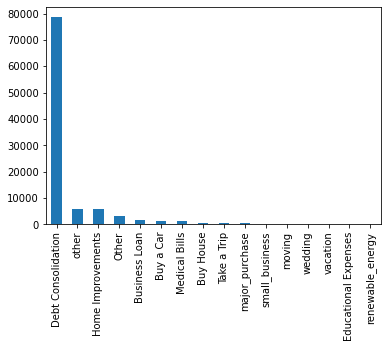

In [97]:
dataset['Purpose'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [98]:
dataset["Purpose"].isnull().sum()

514

In [99]:
dataset = dataset.dropna(axis=0, subset=['Purpose'])

In [100]:
dataset["Purpose"].isnull().sum()

0

In [101]:
dataset.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Tax Liens                       10
dtype: int64

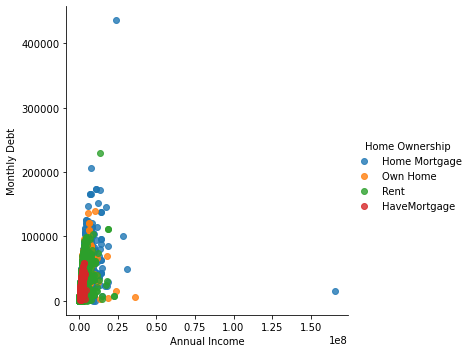

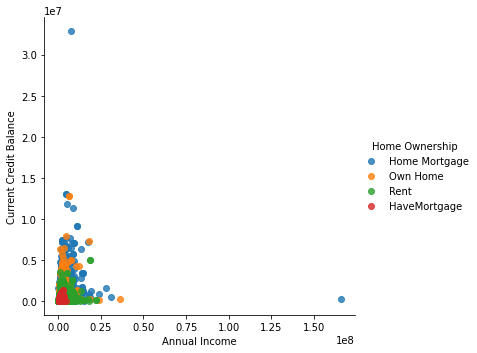

In [103]:
l3 = sns.lmplot(data=dataset,x='Annual Income',y='Monthly Debt',fit_reg=False,hue = 'Home Ownership')
l4 = sns.lmplot(data=dataset,x='Annual Income',y='Current Credit Balance',fit_reg=False,hue = 'Home Ownership')

Various plot were drawn to find out any possible clusters which might help in imputing null "Annual Income" values.
But as we couldnt plot any, we can directly drop null values

In [104]:
dataset = dataset.dropna(axis=0, subset=['Annual Income'])

In [105]:
dataset = dataset.dropna(axis=0, subset=['Years in current job'])
dataset = dataset.dropna(axis=0, subset=['Maximum Open Credit'])
dataset = dataset.dropna(axis=0, subset=['Tax Liens'])

In [106]:
dataset.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Tax Liens                    0
dtype: int64

#### Encoding Categorical Variables

In [107]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

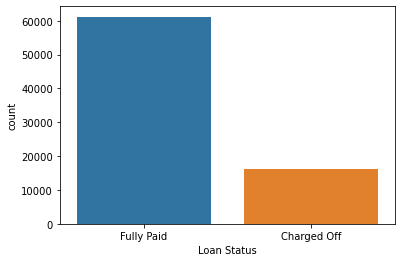

In [108]:
sns.countplot(x='Loan Status',data=dataset)
plt.show()

In [109]:
dataset['Loan Status']= le.fit_transform(dataset['Loan Status'])

In [110]:
dataset['Loan Status'].unique()

array([1, 0])

1 - Fully paid  ; 0 - charged off

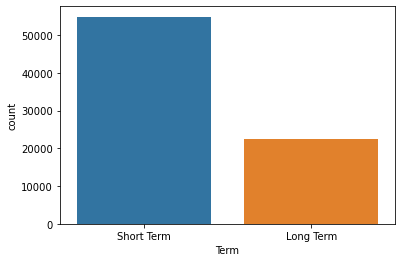

In [111]:
sns.countplot(x='Term',data=dataset)
plt.show()

In [112]:
dataset['Term']=le.fit_transform(dataset['Term'])

In [113]:
dataset['Term'].unique()

array([1, 0])

1 - Short Term ; 0 - Long Term

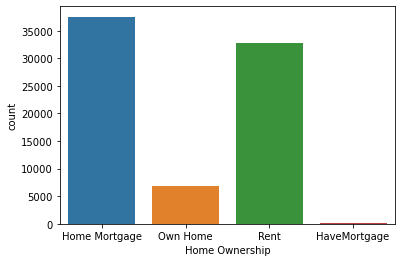

In [114]:
sns.countplot(x='Home Ownership',data=dataset)
plt.show()

In [115]:
dataset['Home Ownership']=le.fit_transform(dataset['Home Ownership'])

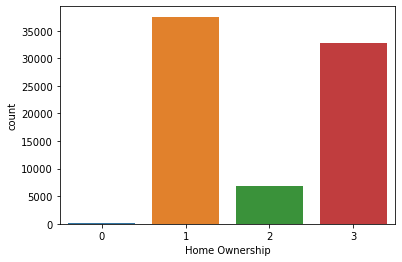

In [116]:
sns.countplot(x='Home Ownership',data=dataset)
plt.show()

0 - Have Mortgage;
1 - Home Mortgage;
2 - Own Home;
3 - Rent

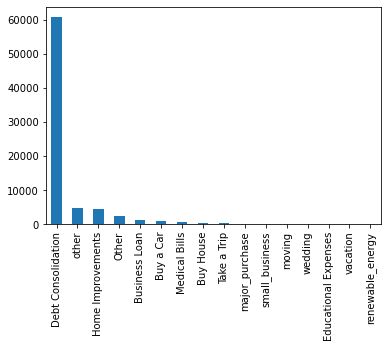

In [117]:
dataset['Purpose'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [118]:
dataset['Purpose']=le.fit_transform(dataset['Purpose'])

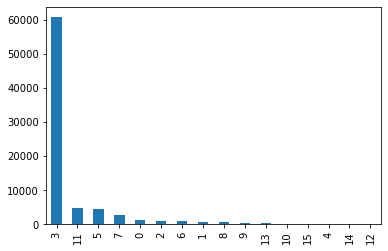

In [119]:
dataset['Purpose'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

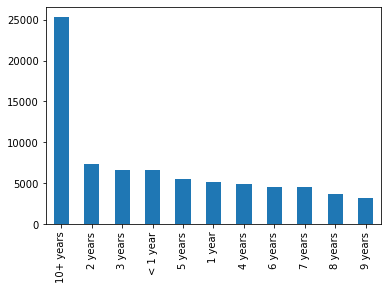

In [120]:
dataset['Years in current job'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [121]:
dataset['Years in current job']=le.fit_transform(dataset['Years in current job'])

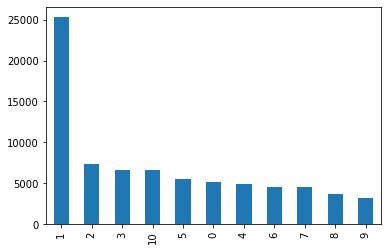

In [122]:
dataset['Years in current job'].value_counts().plot(kind='bar')
plt.plot()
plt.show()

#### Dividing dependent and independent variables

In [123]:
X = dataset.drop(columns=['Loan Status'])
y = dataset['Loan Status']

In [124]:
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.0
2,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
5,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0
6,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,0.0


In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77427 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        77427 non-null  float64
 1   Term                       77427 non-null  int32  
 2   Credit Score               77427 non-null  float64
 3   Annual Income              77427 non-null  float64
 4   Years in current job       77427 non-null  int32  
 5   Home Ownership             77427 non-null  int32  
 6   Purpose                    77427 non-null  int32  
 7   Monthly Debt               77427 non-null  float64
 8   Years of Credit History    77427 non-null  float64
 9   Number of Open Accounts    77427 non-null  float64
 10  Number of Credit Problems  77427 non-null  float64
 11  Current Credit Balance     77427 non-null  float64
 12  Maximum Open Credit        77427 non-null  float64
 13  Tax Liens                  77427 non-null  flo

In [126]:
X['Term']=X['Term'].astype('category')
X['Years in current job']=X['Years in current job'].astype('category')
X['Home Ownership']=X['Home Ownership'].astype('category')
X['Purpose']=X['Purpose'].astype('category')

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77427 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Current Loan Amount        77427 non-null  float64 
 1   Term                       77427 non-null  category
 2   Credit Score               77427 non-null  float64 
 3   Annual Income              77427 non-null  float64 
 4   Years in current job       77427 non-null  category
 5   Home Ownership             77427 non-null  category
 6   Purpose                    77427 non-null  category
 7   Monthly Debt               77427 non-null  float64 
 8   Years of Credit History    77427 non-null  float64 
 9   Number of Open Accounts    77427 non-null  float64 
 10  Number of Credit Problems  77427 non-null  float64 
 11  Current Credit Balance     77427 non-null  float64 
 12  Maximum Open Credit        77427 non-null  float64 
 13  Tax Liens                  7742

In [128]:
y.head()

0    1
2    1
3    1
5    0
6    1
Name: Loan Status, dtype: int32

## Splitting the dataset into train and test set

In [129]:
#X = X[['Term', 'Years in current job', 'Home Ownership','Purpose','Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Tax Liens']] 

In [130]:
X

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.0
2,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
5,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0
6,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,210584.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0
99995,147070.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0
99996,99999999.0,1,732.0,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0
99997,103136.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,0.0


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [132]:
X_train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
96107,545336.0,0,667.0,1412897.0,1,3,3,36970.58,22.7,12.0,0.0,315248.0,651816.0,0.0
75344,331892.0,1,7380.0,1199052.0,6,1,3,23381.40,24.5,12.0,1.0,161120.0,690976.0,0.0
88975,359678.0,1,710.0,3300414.0,7,1,3,71508.97,14.2,17.0,0.0,5173491.0,6909298.0,0.0
20349,216436.0,1,719.0,1308454.0,1,3,3,18209.41,8.2,9.0,0.0,138909.0,235818.0,0.0
5731,405086.0,1,7400.0,1431916.0,5,1,5,15548.27,22.7,13.0,1.0,25764.0,234960.0,0.0


In [133]:
X_test.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
83369,301070.0,0,685.0,771856.0,2,1,3,18395.80,13.5,8.0,0.0,88198.0,203456.0,0.0
63492,257576.0,0,722.0,889846.0,1,1,3,12902.71,15.6,18.0,0.0,582407.0,907632.0,0.0
95236,761772.0,1,704.0,2725531.0,3,1,3,16103.26,16.8,19.0,0.0,464721.0,2260940.0,0.0
92546,613404.0,0,691.0,1702818.0,1,1,3,42144.66,19.5,15.0,0.0,444714.0,901824.0,0.0
84422,154748.0,1,708.0,928131.0,8,1,3,8948.62,17.3,10.0,0.0,112689.0,266288.0,0.0


## Training the data set using Classification models

In [134]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0,max_iter=200)
classifier_lg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=0)

In [135]:
#K-nn
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [160]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=800,max_depth=9)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=800)

In [161]:
y_pred_lg = classifier_lg.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_rf = classifier_rf.predict(X_test)

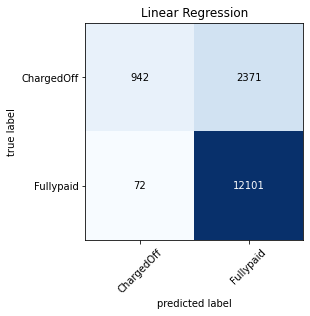

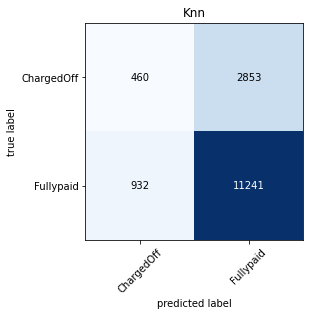

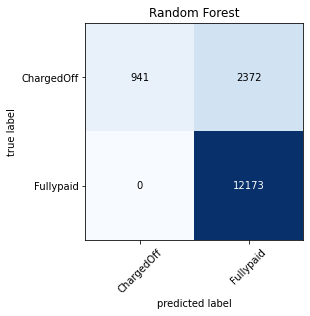

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

class_names = ['ChargedOff','Fullypaid']
cm_lg = confusion_matrix(y_test, y_pred_lg)
fig,ax=plot_confusion_matrix(conf_mat=cm_lg,class_names=class_names)

plt.title("Linear Regression")

class_names = ['ChargedOff','Fullypaid']
cm_knn = confusion_matrix(y_test, y_pred_knn)
fig,ax=plot_confusion_matrix(conf_mat=cm_knn,class_names=class_names)
plt.title("Knn")

class_names = ['ChargedOff','Fullypaid']
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig,ax=plot_confusion_matrix(conf_mat=cm_rf,class_names=class_names)
plt.title("Random Forest")

plt.show()


In [174]:
from sklearn.metrics import  accuracy_score
print("Accuracy of Logistic Regression: ",accuracy_score(y_test,y_pred_lg))
print("Accuracy of Knn: ",accuracy_score(y_test,y_pred_knn))
print("Accuracy of Random forest:",accuracy_score(y_test,y_pred_rf))

Accuracy of Logistic Regression:  0.8422446080330621
Accuracy of Knn:  0.7555856903009169
Accuracy of Random forest: 0.8468293942916182


In [158]:
from sklearn.metrics import classification_report

In [164]:
print("Logistic Regression:")
print(classification_report(y_test,y_pred_lg))
print("K Nearest Neighbours:")
print(classification_report(y_test,y_pred_knn))
print("Random Forest:")
print(classification_report(y_test,y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.28      0.44      3313
           1       0.84      0.99      0.91     12173

    accuracy                           0.84     15486
   macro avg       0.88      0.64      0.67     15486
weighted avg       0.86      0.84      0.81     15486

K Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20      3313
           1       0.80      0.92      0.86     12173

    accuracy                           0.76     15486
   macro avg       0.56      0.53      0.53     15486
weighted avg       0.70      0.76      0.71     15486

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44      3313
           1       0.84      1.00      0.91     12173

    accuracy                           0.85     15486
   macro avg       0.92      0.64      0.68     15486
weighted avg    

## Training by balancing the data

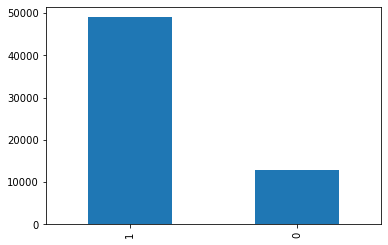

In [176]:
y_train.value_counts().plot(kind='bar')
plt.plot()
plt.show()

In [207]:
class_weight=dict({0:1,1:200})

In [208]:
classifier_rf1=RandomForestClassifier(class_weight=class_weight)
classifier_rf1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 200})

In [209]:
y_pred_rf1 = classifier_rf1.predict(X_test)

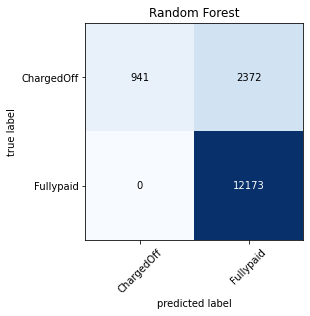

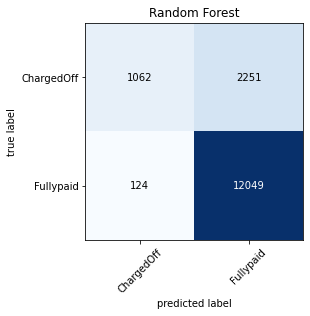

In [219]:
class_names = ['ChargedOff','Fullypaid']
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig,ax=plot_confusion_matrix(conf_mat=cm_rf,class_names=class_names)
plt.title("Random Forest")

class_names = ['ChargedOff','Fullypaid']
cm_rf1 = confusion_matrix(y_test, y_pred_rf1)
fig,ax=plot_confusion_matrix(conf_mat=cm_rf1,class_names=class_names)
plt.title("Random Forest")
plt.show()



In [175]:
print("Random Forest:")
print("Accuracy of Random forest:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf1))

Random Forest:
Accuracy of Random forest: 0.8468293942916182
              precision    recall  f1-score   support

           0       0.91      0.31      0.46      3313
           1       0.84      0.99      0.91     12173

    accuracy                           0.85     15486
   macro avg       0.88      0.65      0.69     15486
weighted avg       0.86      0.85      0.81     15486

